# **Цель лабораторной работы**

Изучить различные методы визуализации данных.

# **Задание**


Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
Для первой лабораторной работы рекомендуется использовать датасет без пропусков в данных, например из Scikit-learn.
Пример преобразования датасетов Scikit-learn в Pandas Dataframe можно посмотреть здесь.
Для лабораторных работ не рекомендуется выбирать датасеты большого размера.

Создать ноутбук, который содержит следующие разделы:
Текстовое описание выбранного Вами набора данных.
Основные характеристики датасета.
Визуальное исследование датасета.
Информация о корреляции признаков.
Сформировать отчет и разместить его в своем репозитории на github.
Средства и способы визуализации данных можно посмотреть здесь.

В качестве опорного примера для выполнения лабораторной работы можно использовать пример.

Дополнительно примеры решения задач, содержащие визуализацию, можно посмотреть в репозитории курса mlcourse.ai - https://github.com/Yorko/mlcourse.ai/wiki/Individual-projects-and-tutorials-(in-Russian)

# Ход выполнения работы

### Текстовое описание набора данных

В качестве набора данных используется toy dataset iris из библиотеки scikit-learn. Этот dataset содержит 
[ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0).


Этот набор данных состоит из одного файла со 150-ю записями. Данный файл содержит следующие колонки:

* sepal length (cm) — длина чашелистика в сантиметрах

- sepal width (cm) — ширина чашелистика в сантиметрах

- petal length — длинна лепестка

- petal width (cm) — ширина липестка

- target — вид ириса (0 = setosa; 1 = versicolor; 2 = virginica)

Основные характеристики набора данных

Подключим все необходимые библиотеки:


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
from sklearn.datasets import *

In [3]:
iris = load_iris(as_frame=True)
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
#df = iris.data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0


# **Основные характеристики датасета**

In [5]:
# Первые пять строк
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
# Размер датасета
df.shape

(150, 5)

In [7]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 150


In [8]:
# Список колонок
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [9]:
# Список колонок с типами данных
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [10]:
# Основные статистические характеристки набора данных
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
# Определим уникальные значения для целевого признака
df['sepal length (cm)'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

# **Визуальное исследование датасета**

# **1) Диаграмма**

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

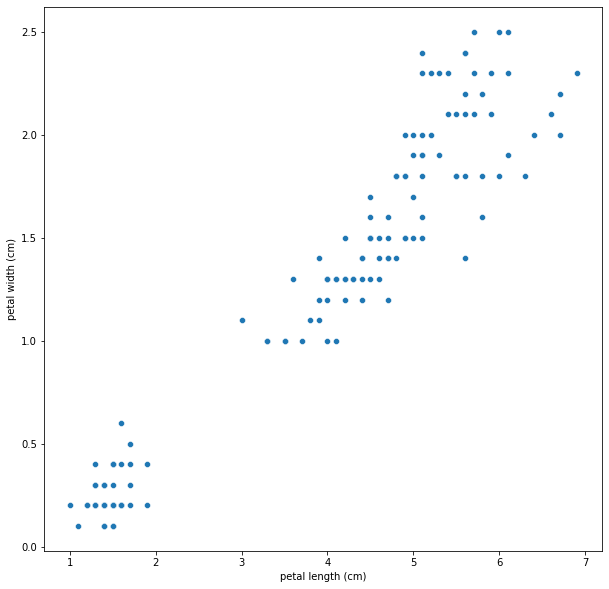

In [12]:
# Диаграмма рассеяния
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='petal length (cm)', y='petal width (cm)', data=df)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

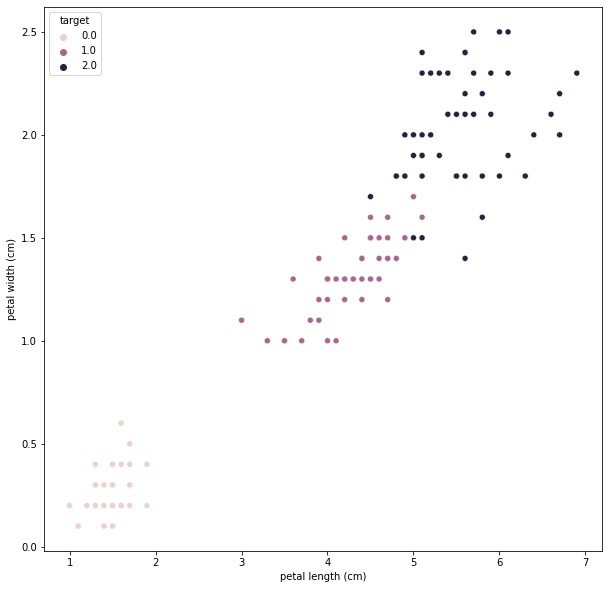

In [13]:
#Зависимость с учетом вида ириса
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='petal length (cm)', y='petal width (cm)', data=df, hue='target')

# **2) Гистограмма**

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Count'>

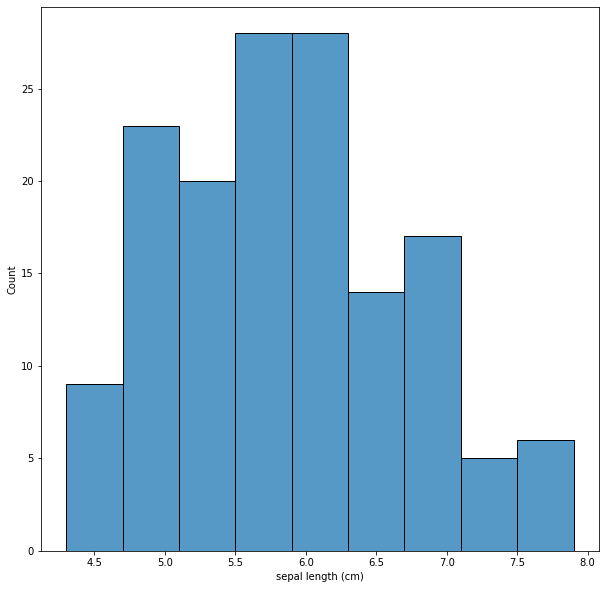

In [14]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(df['sepal length (cm)'])

# **3) Парные диаграммы**

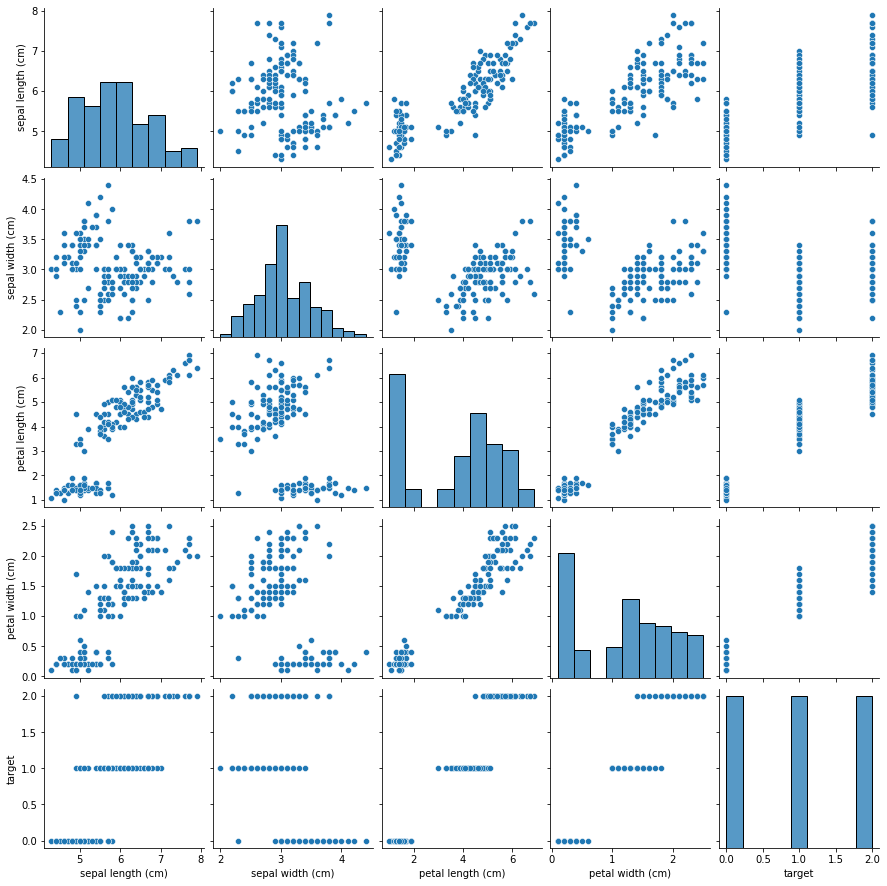

In [15]:
sns.pairplot(df)

# 4) Ящик с усами
   ### Отображает одномерное распределение вероятности

<AxesSubplot:xlabel='target'>

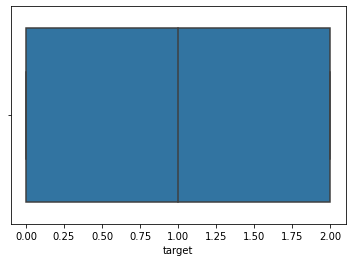

In [16]:
sns.boxplot(x=df['target'])

<AxesSubplot:xlabel='petal width (cm)'>

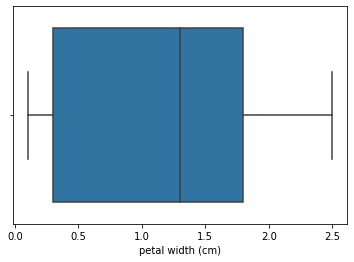

In [17]:
sns.boxplot(x=df['petal width (cm)'])

<AxesSubplot:xlabel='target', ylabel='petal width (cm)'>

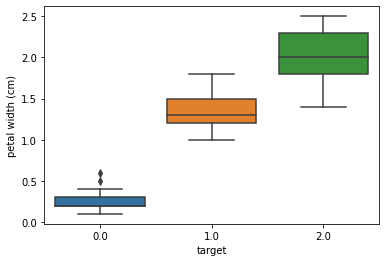

In [18]:
# Распределение параметра petal width (cm) сгруппированные по target.
sns.boxplot(x='target', y='petal width (cm)', data=df)

# 5) Информация о корреляции признаков

In [22]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


# 6) Использование тепловой карты

<AxesSubplot:>

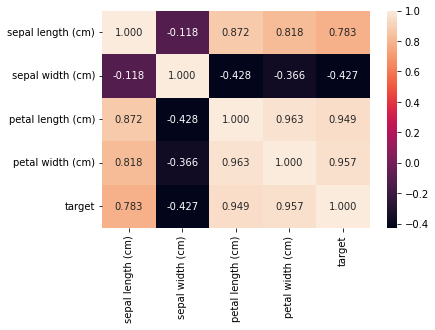

In [23]:
# Вывод значений в ячейках
sns.heatmap(df.corr(), annot=True, fmt='.3f')

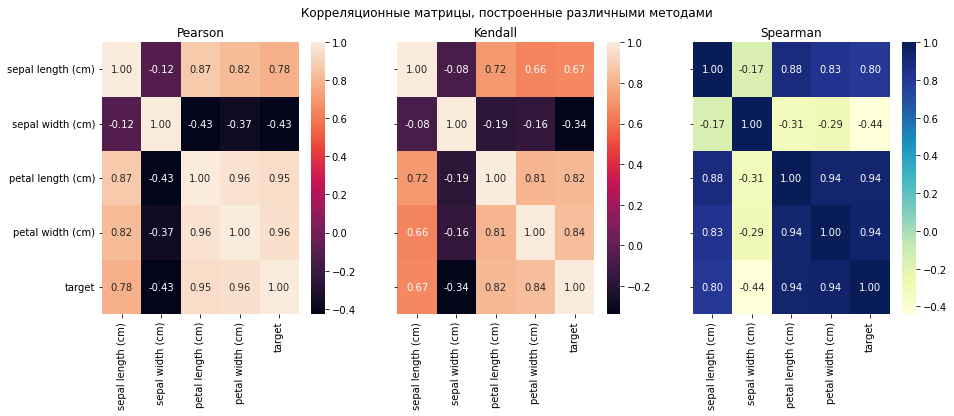

In [29]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(df.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(df.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(df.corr(method='spearman'), ax=ax[2], cmap='YlGnBu', annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')